In [25]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
from api_key import covid_key
import requests
import json


file1 = "./Data/UnemploymentRate.csv"
file2 = "./Data/TotalUnemployment.csv"
merged = "./Data/merged_data.csv"
url = "https://api.covidactnow.org/v2/county/29095.timeseries.json?apiKey=" + covid_key + "&t="
UnemploymentRate = pd.read_csv(file1)
TotalUnemployment = pd.read_csv(file2)
UnemploymentRate.head()
TotalUnemployment.head()


,Series ID,Date,Value
0,LAUCN290950000000004,2019-01-01,15455
1,LAUCN290950000000004,2019-02-01,14549
2,LAUCN290950000000004,2019-03-01,15008
3,LAUCN290950000000004,2019-04-01,11260
4,LAUCN290950000000004,2019-05-01,12159


In [4]:
UnemploymentRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Series ID  24 non-null     object 
 1   Date       24 non-null     object 
 2   Value      24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 704.0+ bytes


In [5]:
rate_df = pd.DataFrame(UnemploymentRate)

In [6]:
        # Average Unemployment in KC for 2019
top = rate_df.loc[0:11]
top.head(3)

,Series ID,Date,Value
0,LAUCN290950000000003,2019-01-01,4.3
1,LAUCN290950000000003,2019-02-01,4.0
2,LAUCN290950000000003,2019-03-01,4.2


In [7]:
        # Average Unemployment rate in Kansas City in 2019
Tvalue = top['Value'].sum()
Avg_rate1 =(Tvalue/12)
print("Average unemployment rate in Kansas City for 2019 was:" +"{:.2%}".format(Avg_rate1/100))

Average unemployment rate in Kansas City for 2019 was:3.72%


<Figure size 432x288 with 0 Axes>

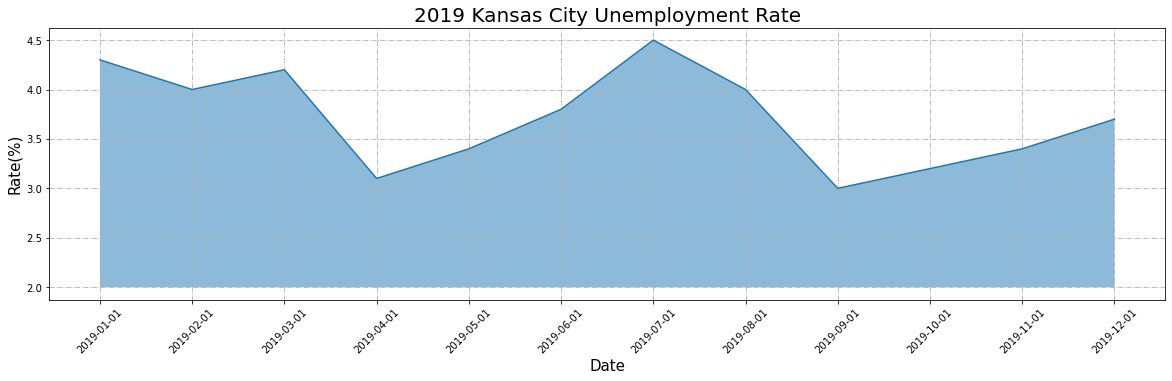

In [8]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(top['Date'], top['Value'])
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.fill_between(top['Date'],top['Value'], 2, alpha=.5)
plt.title("2019 Kansas City Unemployment Rate", fontsize = 20)
plt.ylabel("Rate(%)", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
ax.grid(b=True, linestyle='-.')
plt.savefig("Output/UnemploymentRate2019.png")
plt.show()

In [9]:
                # 2020 Unemployment rate information
bottom = rate_df.loc[12:23]
bottom.head(3)

,Series ID,Date,Value
12,LAUCN290950000000003,2020-01-01,4.3
13,LAUCN290950000000003,2020-02-01,3.9
14,LAUCN290950000000003,2020-03-01,4.4


In [10]:
Bvalue = bottom['Value'].sum()
Bvalue

84.10000000000001

In [11]:
        # Average Unemployment rate in Kansas City in 2020
Bvalue = bottom['Value'].sum()
Avg_rate2 = Bvalue/12
print("Average unemployment rate in Kansas City for 2019 was:" +"{:.2%}".format(Avg_rate2/100))

Average unemployment rate in Kansas City for 2019 was:7.01%


<Figure size 432x288 with 0 Axes>

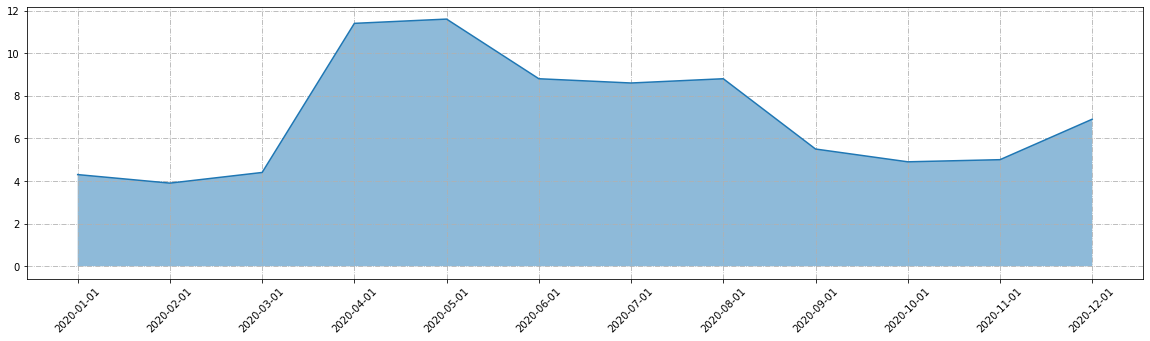

In [12]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(bottom['Date'],bottom['Value'])
plt.fill_between(bottom['Date'],bottom['Value'], 0, alpha=.5)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
ax.grid(b=True, linestyle='-.')
section = np.arange(-1, 1, 1/20.)
plt.savefig("Output/UnemploymentRate2020.png")
plt.show()

In [13]:
unemployment19 = top["Value"]
unemployment20 = bottom["Value"]

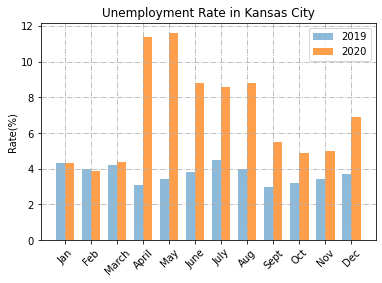

In [14]:
N = 12
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, unemployment19,width, alpha=.5, label='2019')
plt.bar(ind + width, unemployment20, width, alpha=.75, label='2020')
plt.ylabel('Rate(%)')
plt.title('Unemployment Rate in Kansas City')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
ax.grid(b=True, linestyle='-.')
plt.xticks(ind + width / 2, ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept','Oct','Nov', 'Dec'))
plt.legend(loc='best')
plt.savefig("Output/UnemploymentRate.png")
plt.show()


<Figure size 432x288 with 0 Axes>

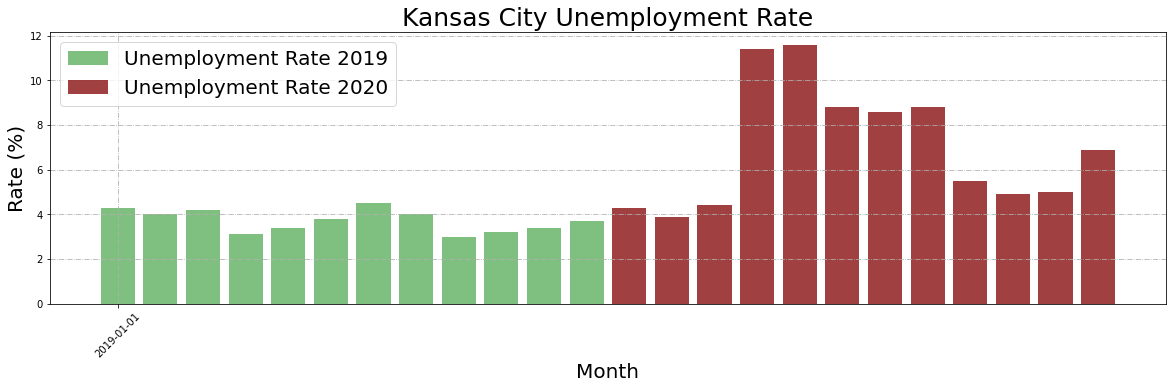

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure()
plt.figure(figsize=(20,5))
rate19 = plt.bar(top['Date'],top['Value'], label = "Unemployment Rate 2019", color = ['green'], alpha=.5)
rate20= plt.bar(bottom['Date'], bottom['Value'], label = "Unemployment Rate 2020", color=['maroon'], alpha=.75)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend (loc="upper left", fontsize = 20)
plt.title('Kansas City Unemployment Rate', fontsize=25)
plt.xlabel("Month", fontsize = 20)
plt.ylabel("Rate (%)", fontsize = 20)
ax.grid(b=True, linestyle='-.')
plt.show()
plt.savefig("Output/Unemployment.png")

In [16]:
        #Total Unemployment in KC

In [17]:
unEmp_df = pd.DataFrame(TotalUnemployment)
bott = unEmp_df.loc[12:23]

<Figure size 432x288 with 0 Axes>

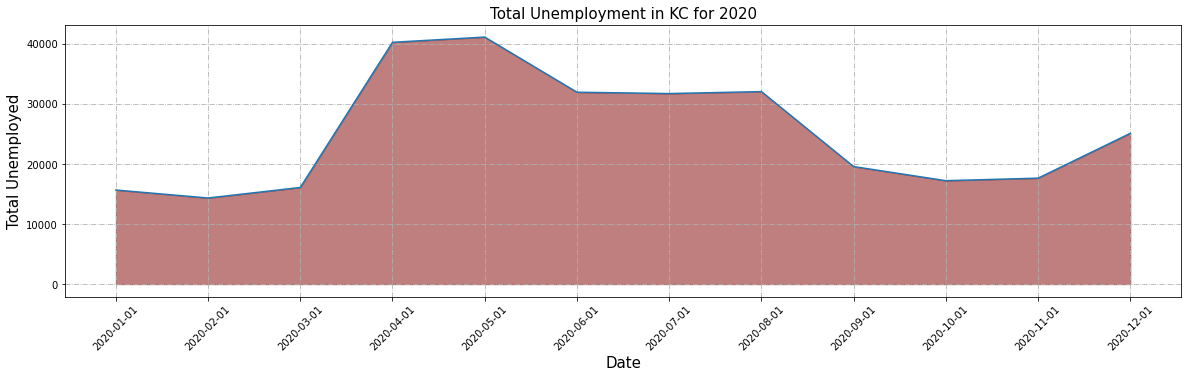

In [18]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(bott['Date'],bott['Value'])
plt.fill_between(bott['Date'],bott['Value'], 2, color = "maroon",alpha=.5)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
ax.grid(b=True, linestyle='-.')
section = np.arange(-1, 1, 1/20.)
plt.title("Total Unemployment in KC for 2020", fontsize = 15)
plt.ylabel("Total Unemployed", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
#plt.legend(loc='best')
plt.savefig("Output/TotalUnemployment2020.png")
plt.show()

In [19]:
firstqtr_df = rona_df[(rona_df['date'] > '2020-01-01') & (rona_Df['date'] <= '2020-12-31')]

NameError: name 'rona_df' is not defined

In [ ]:
        #COVID

In [ ]:
response = requests.get(url).json()
response

In [ ]:
series_df = (response['actualsTimeseries'])
series_df

In [ ]:
total_df = pd.DataFrame(series_df)
total_df

In [ ]:
case_df = pd.DataFrame(total_df[['date', 'cases', 'deaths', 'newCases']])
case_df

In [ ]:
pd.to_datetime(case_df['date'])

In [ ]:
case_df.info()

In [ ]:
case_df["date"]= pd.to_datetime(case_df["date"])

In [ ]:
rona_df = case_df.fillna(0)
rona_df 

In [ ]:
print(rona_df.info())

In [ ]:
#plt.figure()
#plt.figure(figsize=(20,5))
#deaths=plt.plot(rona_df['date'], rona_df['newCases'], label="deaths")
#newCases= plt.bar(rona_df['date'], rona_df['newCases'], label = "newCases", color=['cyan'])
#ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%D-%M'))
#plt.gcf().autofmt_xdate() # Rotation
#plt.legend (loc="upper right", fontsize = 20)
#plt.title('COVID Deaths vs. New Cases', fontsize=25)
#plt.xlabel("Year", fontsize = 20)
#plt.ylabel("Count", fontsize = 20)
#ax.grid(b=True)
#plt.savefig("output/rona_12.png")
#plt.show()

In [ ]:
casesYr_df = rona_df[(rona_df['date'] > '2020-01-01') & (rona_df['date'] <= '2020-12-31')]
unempYr_df = bott[(bott['Date'] > '2020-01-01') & (bott['Date'] <= '2020-12-31')]

In [ ]:
plt.figure()
plt.figure(figsize=(20,5))
plt.plot(unempYr_df['Date'],unempYr_df['Value'])
plt.plot(casesYr_df['date'], casesYr_df['newCases'])
#plt.fill_between(bottom['Date'],bottom['Value'], 0)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
ax.grid(b=True, linestyle='-.')
section = np.arange(-1, 1, 1/20.)
plt.title("Total Unemployment in KC for 2020", fontsize = 15)
plt.ylabel("Total Unemployed", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
#plt.legend(loc='best')
plt.savefig("Output/TotalUnemployment2020.png")
plt.show()

In [27]:
merged_data = pd.read_csv(merged)
merged_data.head()

,Unnamed: 0,Date,COVID-19 Cases,COVID-19 Deaths,COVID-19 New Cases,Crimes,Unemployment Rate (%),Unemployment
0,0,2020-01-01,0.0,0.0,0.0,0,4.3,15683.0
1,1,2020-02-01,0.0,0.0,0.0,0,3.9,14354.0
2,2,2020-03-01,360.0,12.0,77.0,0,4.4,16106.0
3,3,2020-04-01,6908.0,253.0,246.0,0,11.4,40281.0
4,4,2020-05-01,13746.0,497.0,273.0,0,11.6,41145.0


In [65]:
sum_df = merged_data.groupby(['Date']).max()
cov_sum = sum_df.loc[:, {"COVID-19 Cases", "COVID-19 New Cases", "Unemployment Rate (%)", "Unemployment"}]
cov_sum.head(12)

,COVID-19 New Cases,COVID-19 Cases,Unemployment Rate (%),Unemployment
Date,,,,
2020-01-01,0.0,0.0,4.3,15683.0
2020-02-01,0.0,0.0,3.9,14354.0
2020-03-01,77.0,360.0,4.4,16106.0
2020-04-01,246.0,6908.0,11.4,40281.0
2020-05-01,273.0,13746.0,11.6,41145.0
2020-06-01,616.0,26685.0,8.8,31967.0
2020-07-01,2110.0,63490.0,8.6,31744.0
2020-08-01,2201.0,139952.0,8.8,32069.0
2020-09-01,2067.0,199999.0,5.5,19584.0


In [74]:
unemp_mean = sum_df['Unemployment'].mean()
cov_mean = sum_df['COVID-19 New Cases'].mean()
print(f'In 2020 there were an average of {("%.f" % unemp_mean)}')
print(f'while there were an average of {("%.f" % cov_mean)} new cases per month')

In 2020 there were an average of 25246
while there were an average of 1941 new cases per month
